## Question 2


In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
## reading information from file 1a.txt

data_file = open('1a.txt', 'r')
tuples = data_file.readlines()
 
# obtaining information from the train data in the text file 1a.txt
x_train = []
y_train = []
for single_tuple in tuples:
    a = single_tuple.split(',')
    x_train += [float(a[0].split('(')[2].split(')')[0])]
    y_train += [float(a[1].split(')')[0])]
    
 ## Reading data from the file 1b.txt   
file1 = open('1b.txt', 'r')
Lines = file1.readlines()
 
# extracting data from the text file 1b.txt which is test data
x_test = []
y_test = []
for line in Lines:
    a = line.split(',')
    x_test += [float(a[0].split('(')[2].split(')')[0])]
    y_test += [float(a[1].split(')')[0])]


In [16]:
gamma = 0.268  ###given in data
###function to find weights
def get_weight_matrix(query, X):
    
    m = X.shape[0] 
    w = np.mat(np.eye(m)) 
    for i in range(m): 
        xi = X[i] 
        d = (-2 * gamma * gamma) 
        w[i, i] = np.exp(np.dot((xi-query), (xi-query).T)/d) 
    return w

In [17]:
###function for creating data point from input x [1,x,sinx,cox,sin2x,....]
def make_data_row(x):
    d=6
    k=9
    x_vec = [1,x]
    for i in range(d): 
        x_vec += [((np.sin(i*k*x))**(i*k))*np.cos(x)]
        x_vec += [((np.cos(i*k*x))**(i*k))*np.sin(x)]  
    return x_vec

#######calculates the gradient values in vector form depending on the model type
def get_gradient(y,x,w,data_w):
    return np.matmul(x.T,np.matmul(data_w,(y - np.matmul(x,w))))


#######does the SGD operation finds grads then update weights, lr=learning_rate, iters= num of iterations of descent
def train(x_in,y_in,lr,iters, point):
    x = np.array(x_in)
    y = np.array(y_in)
    
    w = np.zeros((x.shape[1],1))  ##weight intitaion
    ini_error = float('inf')
    y = y.reshape(-1,1)
    data_w = get_weight_matrix(point, x)
    for i in range(iters):
        w_d = get_gradient(y,x,w,data_w)  ##gradient value
        cur_error = y - np.matmul(x,w+lr*w_d)
        cur_error = np.mean(np.square(cur_error))
        if(cur_error>ini_error):
            break
        w= w+lr*w_d    ##gradient value update
    return w

In [18]:
# train(x_train_vec,y_train,0.00005,1000,"Linear_Regression" )

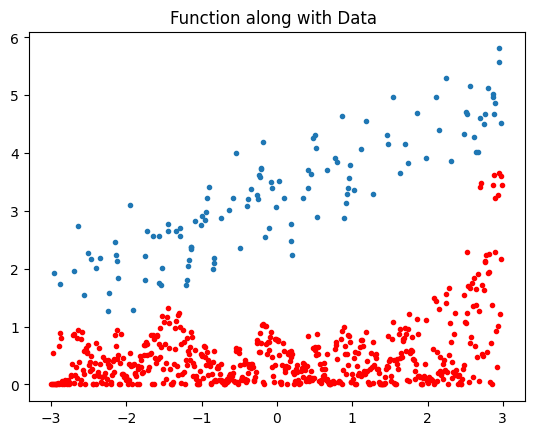

In [19]:
###2a,b)
x_train_vec = []
#####making train data vector 
for x in x_train:
    x_train_vec+= [make_data_row(x)]

n = 100
plt.figure()
plt.title("Function along with Data ")
plt.plot(x_train,y_train,'.')

####for plotting function with data take 200 samples from -3 to 3  then find the predicton and plot
for i in range(-3*n,3*n):
    x = i/n
    x_test_p = make_data_row(x)
    weights = train(x_train_vec,y_train,0.00005,1000,x_test_p)

    x_test_p = np.array([x_test_p])
    y_pred = np.matmul(x_test_p,weights)
    plt.plot(x,y_pred,'.',color='red')
    

TypeError: train() takes 5 positional arguments but 6 were given

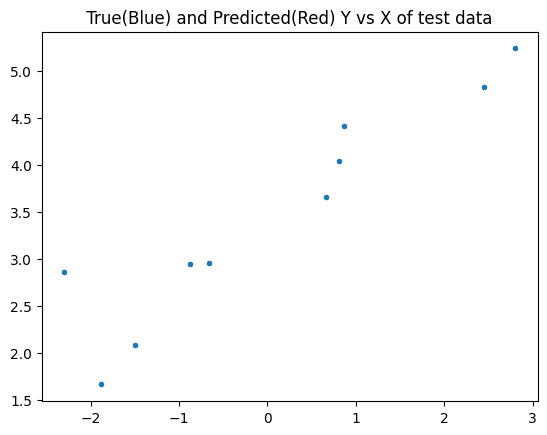

In [20]:
####2c) 
x_test_vec = []
mse_list = []

plt.figure()
plt.title(" True(Blue) and Predicted(Red) Y vs X of test data ")
plt.plot(x_test,y_test,'.')
###creating list of input data points using make_data_row function
for x,y in zip(x_test,y_test):
    x_test_vec+= [make_data_row(x)]
    x_test_p = make_data_row(x)
    ##train model for each test data
    weights = train(x_train_vec,y_train,0.00005,1000,x_test_p)
    x_pred = []
    x_pred_val = []

    x_test_p = np.array([x_test_p])
    y_pred = np.matmul(x_test_p,weights)
    y_test = np.array(y_test).reshape(-1,1)
    
    ##2c) mean squre error calculation
    mse = y_pred-y_test
    mse = np.mean(np.square(mse))
    mse_list = [mse]
    plt.plot(x,y_pred,'.',color='red')

print("final MSE of all test data is "+str(np.mean(mse_list)))

final MSE of all test data is 11.996726020974458


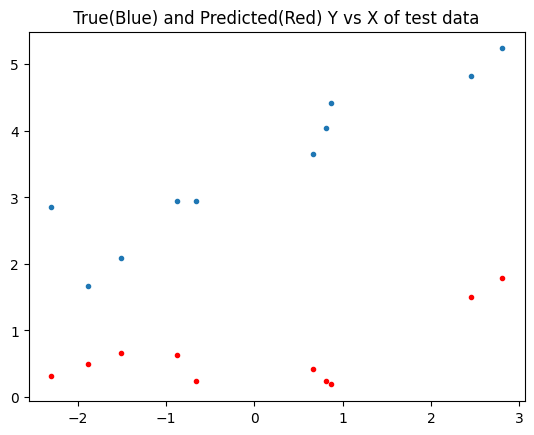

In [ ]:
####2d) 
### only change x_train[:20] needs to be used as first 20


mse_list = []
D_range = range(0,7)

#####first 20 only 
x_train = x_train[:20]
y_train = y_train[:20]

x_train_vec = []
##making train data vector
for x in x_train:
    x_train_vec+= [make_data_row(x)]

mse_list = []

plt.figure()
plt.title(" True(Blue) and Predicted(Red) Y vs X of test data ")
plt.plot(x_test,y_test,'.')
###creating list of input data points using make_data_row function
for x,y in zip(x_test,y_test):
    x_test_vec+= [make_data_row(x)]
    x_test_p = make_data_row(x)
    weights = train(x_train_vec,y_train,0.00005,1000,x_test_p,"Linear_Regression")
    x_pred = []
    x_pred_val = []

    x_test_p = np.array([x_test_p])
    y_pred = np.matmul(x_test_p,weights)
    y_test = np.array(y_test).reshape(-1,1)
    ##1c) mean squre error calculation
    mse = y_pred-y_test
    mse = np.mean(np.square(mse))
    mse_list = [mse]
    plt.plot(x,y_pred,'.',color='red')

print("final MSE of all test data is "+str(np.mean(mse_list)))